In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

In [2]:
# Load the data
loan_training_dataset = pd.read_csv('Loan_Train.csv')

In [3]:
# Print out the top 5 rows of data
loan_training_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Check for missing values
loan_training_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# Fill missing values for categorical columns with the mode
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    loan_training_dataset[column].fillna(loan_training_dataset[column].mode()[0], inplace=True)

# Fill missing values for numeric column with the median
loan_training_dataset['LoanAmount'].fillna(loan_training_dataset['LoanAmount'].median(), inplace=True)

# Check if all missing values are filled now
loan_training_dataset.isnull().sum()

C:\Users\qadee\AppData\Local\Temp\ipykernel_22948\464371214.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_training_dataset[column].fillna(loan_training_dataset[column].mode()[0], inplace=True)
C:\Users\qadee\AppData\Local\Temp\ipykernel_22948\464371214.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
# Encode the columns with categorical 
columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']
label_encoder = LabelEncoder()
for col in columns:
   # Label encoder converts the categories into numbers
    loan_training_dataset[col] = label_encoder.fit_transform(loan_training_dataset[col])

In [7]:
# One-hot encoding for categorical columns with more than two categories
columns_to_encode = ['Dependents', 'Property_Area']
one_hot_encoded_data = pd.get_dummies(loan_training_dataset, columns=columns_to_encode, drop_first=True)

In [8]:
# Drop 'Loan_ID' because it's  an identifier and 'Loan_Status' as it's the target
X = one_hot_encoded_data.drop(['Loan_ID', 'Loan_Status'], axis=1)
# 'Loan_Status' column as the target variable
y = one_hot_encoded_data['Loan_Status']

In [9]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Create a Decision Tree classifier and fit it to the training data
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# Predict on the test data
y_pred = dt_classifier.predict(X_test)

In [12]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred, target_names=['Rejected', 'Approved'])
print(class_report)

Accuracy: 0.7243243243243244
              precision    recall  f1-score   support

    Rejected       0.63      0.51      0.56        65
    Approved       0.76      0.84      0.80       120

    accuracy                           0.72       185
   macro avg       0.70      0.67      0.68       185
weighted avg       0.72      0.72      0.72       185



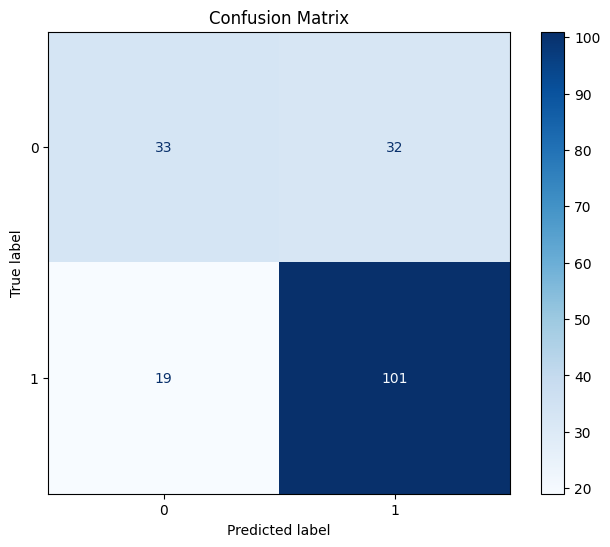

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
# Display the confusion matrix for the classifier's predictions on test data with color and labels.
ConfusionMatrixDisplay.from_estimator(dt_classifier, X_test, y_test, ax=ax, cmap='Blues')
# Title for the plotted table
plt.title('Confusion Matrix')
# Display the plot
plt.show()

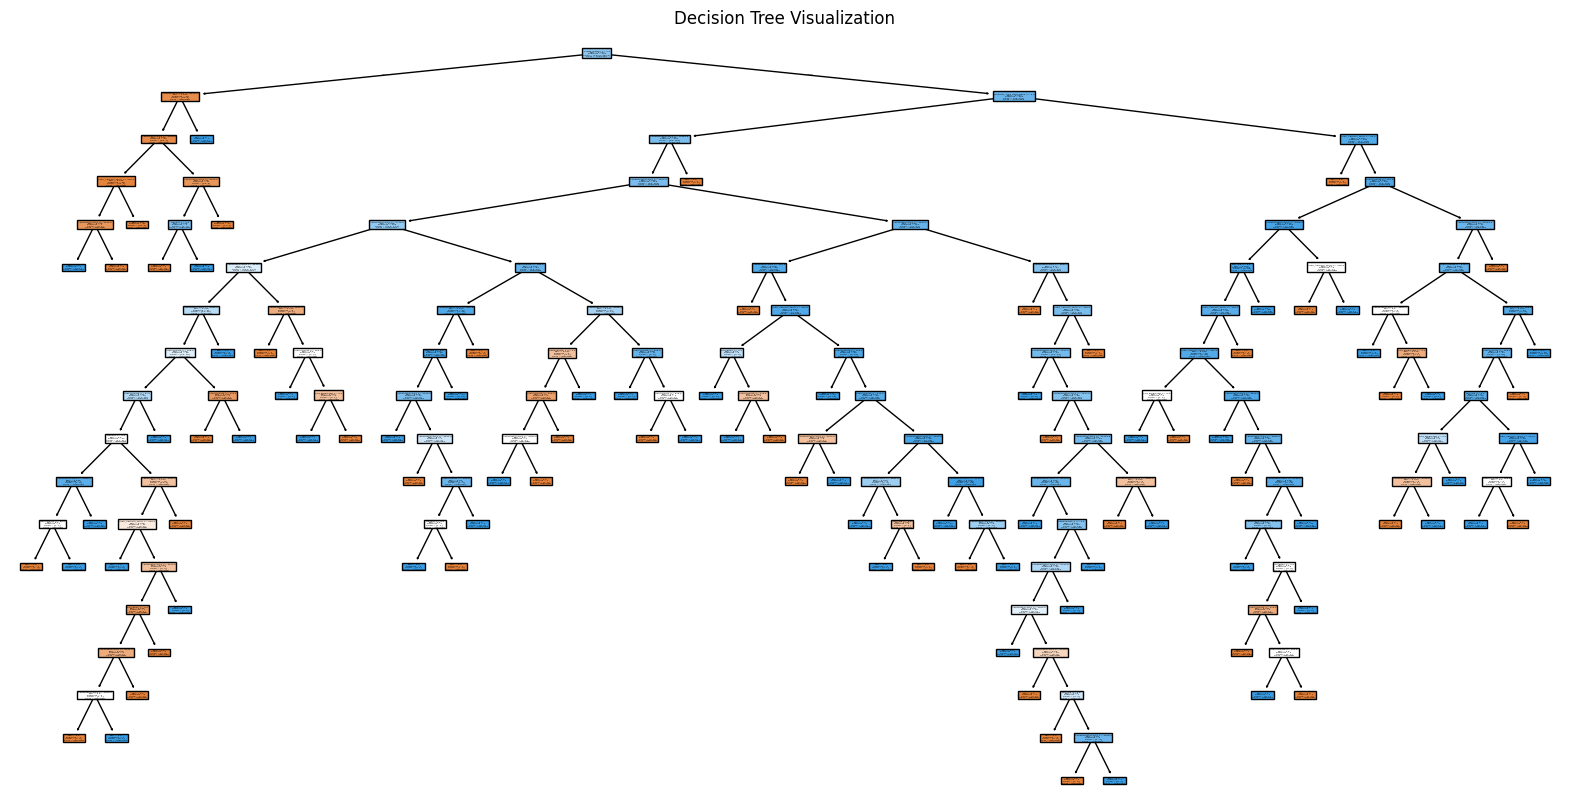

In [14]:
# Plot the decision tree
fig, ax = plt.subplots(figsize=(20, 10))
# Plot decision tree
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Rejected', 'Approved'], ax=ax)
# Title for the plot
plt.title('Decision Tree Visualization')
# Display the plot
plt.show()

In [15]:
# By creating the abopve Decision tree we are able to create the confuion metrix report and visualize the Decision Tree. This Decision Tree is not readable. The tree depth was created to make the decisin tree smaller and more readable.

In [16]:
# Set the tree depth variable
tree_depth = 3

In [17]:
# Create a Decision Tree classifier with a specified max depth and fit it to the training data
dt_classifier = DecisionTreeClassifier(max_depth=tree_depth, random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [18]:
# Predict on the test data
y_pred = dt_classifier.predict(X_test)

In [19]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred, target_names=['Rejected', 'Approved'])
print(class_report)

Accuracy: 0.7837837837837838
              precision    recall  f1-score   support

    Rejected       0.93      0.42      0.57        65
    Approved       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



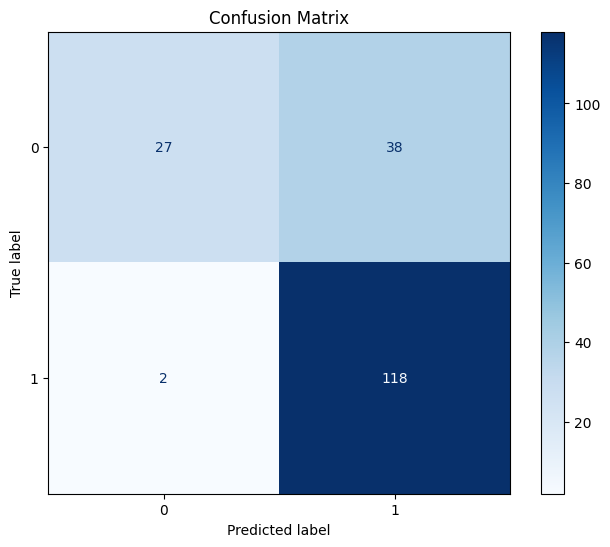

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(dt_classifier, X_test, y_test, ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

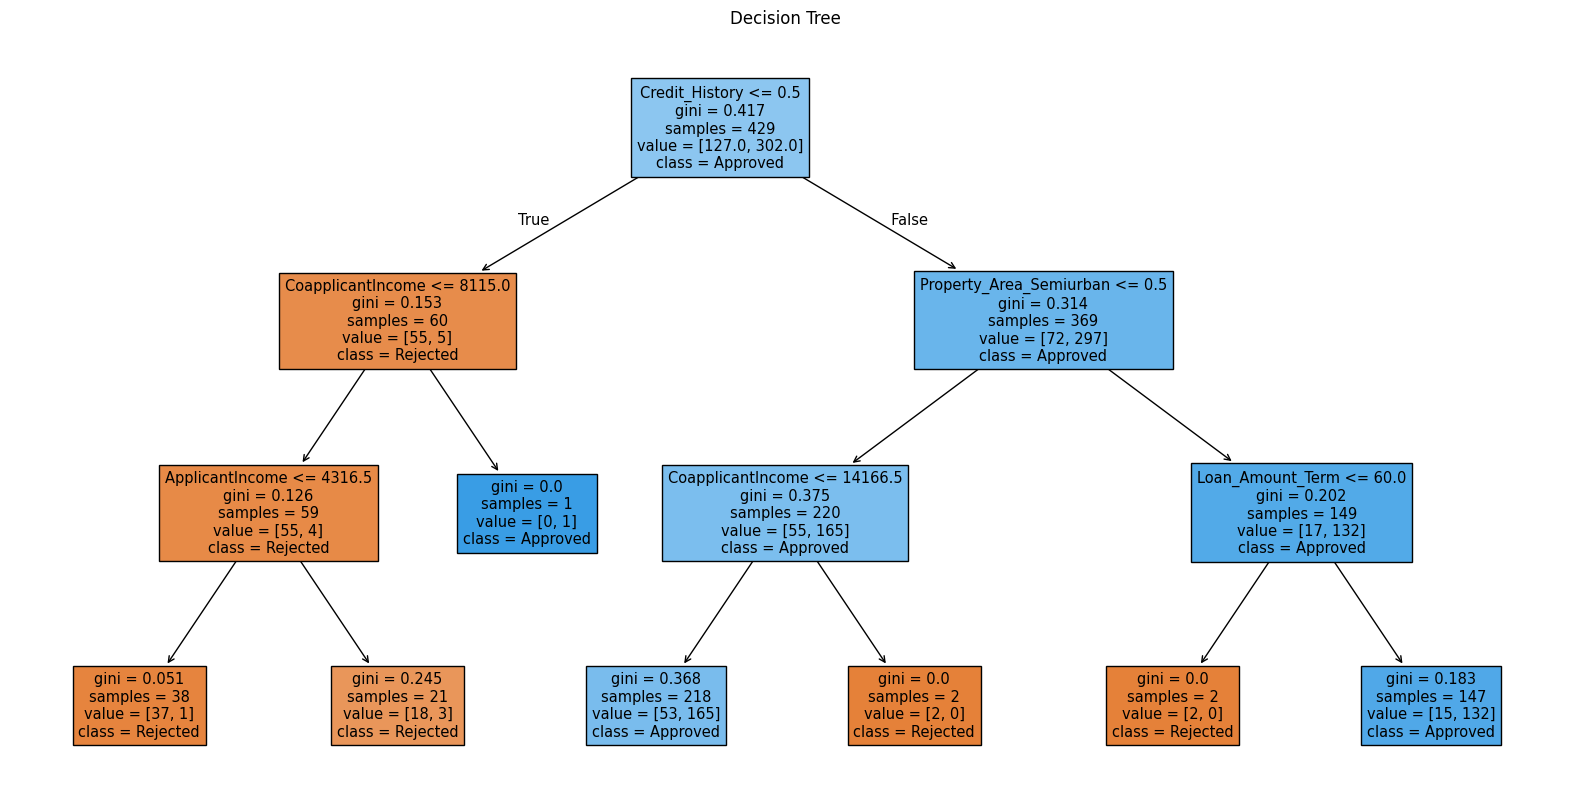

In [21]:
# Plot the decision tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Rejected', 'Approved'], ax=ax)
plt.title('Decision Tree')
plt.show()